In [1]:
#!/usr/bin/env python3 

In [7]:
# Author: Mbonu Chinedum Endurance 
# Team: TEAM-358-GROUP-A 
# Description: FASGD-III (Sound Wave Analysis) 
# Program: ANDELA BUILD FOR SDG COHORT-2 2020 
# Country: Nigeria 
# Date Created: 5-sep-2020 
# Date Modified: 

In [1]:
# Importing the necessary modules 
import os 
import wave
import librosa 
import numpy as np
import pandas as pd 
import pickle as pkl 
import soundfile as sf 
import matplotlib.pyplot as plt 
from pydub import AudioSegment 
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam 
from sklearn.preprocessing import LabelEncoder 
from tensorflow.keras.models import Sequential 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D 

In [2]:
# Converting the songs into wav formats and getting the path 
# to the working directory 
path = "dataset"

# Setting path to the audio files and converting them into wav formats 
chinedu_voices_dir = os.path.sep.join([path, "chinedu_voices"])
unknown_voices_dir = os.path.sep.join([path, "unknown_voices"])

# Creating a function for converting the voices into wav format 
def convert_to_wav(audio_voice, saved_path):
    # Converting the mp3 file into a wav file 
    sound = AudioSegment.from_file(audio_voice) 
    # Exporting the converted mp3 files to a new folder 
    sound.export(saved_path, format="wav")
    
    

In [236]:
# Converting the mp3 files into wav format for the unknown voices 
unknown_count = 0 

# listing all the mp3 files in the unknown directory 
for songs in sorted(os.listdir(unknown_voices_dir)): 
    # Getting the full path name for pre-processing 
    full_path = os.path.sep.join([unknown_voices_dir, songs])
    # Setting the path to the new directory for the converted mp3 to wav 
    saved_to = "dataset/unknown_wav/00{}.wav".format(unknown_count) 
    # Converting and saving it to disk 
    convert_to_wav(full_path, saved_to) 
    # Incrementing the count by one. 
    unknown_count += 1 
    
# Value for converted mp3 files 
print("The value converted:", unknown_count)                

The value converted: 504


In [3]:
# Converting the mp3 files into wav format for chinedu voices 
chinedu_count = 0 

# Listing all the mp3 files in chinedu voice directory 
for songs in sorted(os.listdir(chinedu_voices_dir)): 
    # Getting the full path name for pre-processing 
    full_path = os.path.sep.join([chinedu_voices_dir, songs])
    # Setting the path to the new directory for the converted mp3 to wav 
    saved_to = "dataset/chinedu_wav/000{}.wav".format(chinedu_count) 
    # Converting the mp3 file into a wav file 
    sound = AudioSegment.from_file(full_path) 
    # Exporting the converted mp3 files to a new folder 
    sound.export(saved_to, format="wav")
    # Incrementing the count by one. 
    chinedu_count += 1 
    
# Value for chinedu mp3 voice file 
print("The value converted for chinedu voices: ", chinedu_count)  

The value converted for chinedu voices:  108


<h1> <b> Feature Extraction </b> </h1> 

In [4]:
# Creating a list to hold both the labels and features 
label = list() 
data = list() 

# Setting the count for both chinedu and unknown to have a 
# Value of zero. 
unknown_count = 0 
chinedu_count = 0 

# Getting the features for the audio wav files by converting the wav files 
# Into a numpy array for easy modelling. 
def get_features(wav_name): 
    # Making a condition only if the wav_name is not None 
    if wav_name: 
        X, sample_rate = librosa.load(wav_name, res_type='kaiser_fast') 
        # X, sample_rate = sf.read(wav_name) 
        
    # Converting the loaded data into a numpy array 
    loaded_data = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40) 
    scaled_data = np.mean(loaded_data.T, axis=0)  
    # Returning the scaled data value 
    return scaled_data 



In [5]:
# Getting the full path to chinedu wav voices  
chinedu_voice = os.path.sep.join([path, "chinedu_wav"])

# Working with the wav files for chinedu voice 
for wav_files in os.listdir(chinedu_voice): 
    # Getting the full path 
    full_path = os.path.sep.join([chinedu_voice, wav_files])
    tag = full_path.split(os.path.sep)[-2].split("_")[0]
    
    # Extracting the data features 
    mfccs = np.asarray(get_features(full_path)) 
    
        
    # Appending the values for the tag and data 
    # to the data list and label list 
    label.append(tag)
    data.append(mfccs)
    
    # Increasing the count by 1 
    chinedu_count += 1 
   


In [6]:
# Getting the full path to the unknown wav voices 
unknown_voice = os.path.sep.join([path, "unknown_wav"])

# Getting the full path to the wav files for the unknown voices  
for wav_files in os.listdir(unknown_voice): 
    # Getting the full path 
    full_path = os.path.sep.join([unknown_voice, wav_files])
    tag = full_path.split(os.path.sep)[-2].split("_")[0]
    
    # Extracting the data features 
    loaded_data = get_features(full_path)
    
    # Appending the values for the tag and data 
    # to the data list and label list 
    label.append(tag) 
    data.append(loaded_data) 
    
    # Increasing the count by 1 
    unknown_count += 1 
  


# Scaling the data down

In [7]:
# Displaying the number of labels and features loaded into memory 
print("Label length: ", len(label))
print("Data Length: ", len(data))

# Making the input and output features 
X = np.array(data) 
y = np.array(label) 

# Scaling down for easy modelling by our neural network 
scaler = StandardScaler() 
# Encoding for the target or label features 
lb = LabelEncoder() 

# Fitting the data and scaling down 
X_scaled = scaler.fit_transform(X) 
y_scaled = lb.fit_transform(y)  

# Converting the "y_scaled" value into categorical values for easy modelling by our neural net 
y_scaled = to_categorical(y_scaled, 2) 

Label length:  612
Data Length:  612


In [8]:
# Saving the encoders 
encoders = (scaler, lb)

# Serilization 
filename = "encoders/label_encoder"
np.save(filename, encoders) 

In [9]:
# Displaying the shape of the encoded values for both input and output features 
print("Scaled input shape: ", X_scaled.shape); 
print("Scaled output shape: ", y_scaled.shape); 

Scaled input shape:  (612, 40)
Scaled output shape:  (612, 2)


In [10]:
# Splitting the input and output features into train test split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                    test_size=0.33, random_state=20) 

# Displaying the shape of the training and testing data for both the input(X) and 
# Output (y) features 
print("Input Shape: {}, {}".format(X_train.shape, X_test.shape)); 
print("Output Shape: {}, {}".format(y_train.shape, y_test.shape)); 

Input Shape: (410, 40), (202, 40)
Output Shape: (410, 2), (202, 2)


# MODEL BUILDING 

In [30]:
# Setting the input dimension for the model 
input_dim = (X_train.shape[1], ) 

# Setting the ouput dimension for the model 
output_dim = y_train.shape[1]

# Creating an instance of the sequential model 
model = Sequential() 
model.add(Dense(250, input_shape=input_dim, activation="relu"))
model.add(Dropout(0.1))

# model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.25))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(2, activation="sigmoid"))

# Compiling the model 
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

# Model summary 
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 250)               10250     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32128     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 42,636
Trainable params: 42,636
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Setthing the number of epochs 
epoch = 200

# Training the model 
H = model.fit(X_train, y_train, batch_size=32, epochs=epoch, validation_data=(X_test, y_test), verbose=1) 

Epoch 1/200
13/13 [==============================] - 0s 20ms/step - loss: 0.4001 - accuracy: 0.8439 - val_loss: 0.2477 - val_accuracy: 0.9109
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.1424 - accuracy: 0.9610 - val_loss: 0.1332 - val_accuracy: 0.9802
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0802 - accuracy: 0.9927 - val_loss: 0.0731 - val_accuracy: 0.9752
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0496 - accuracy: 0.9927 - val_loss: 0.0470 - val_accuracy: 0.9802
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0272 - accuracy: 0.9951 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 0.0222 - accuracy: 0.9951 - val_loss: 0.0232 - val_accuracy: 0.9901
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.0140 - accuracy: 0.9976 - val_loss: 0.0176 - val_accuracy: 0.9901
Epoch 8/200


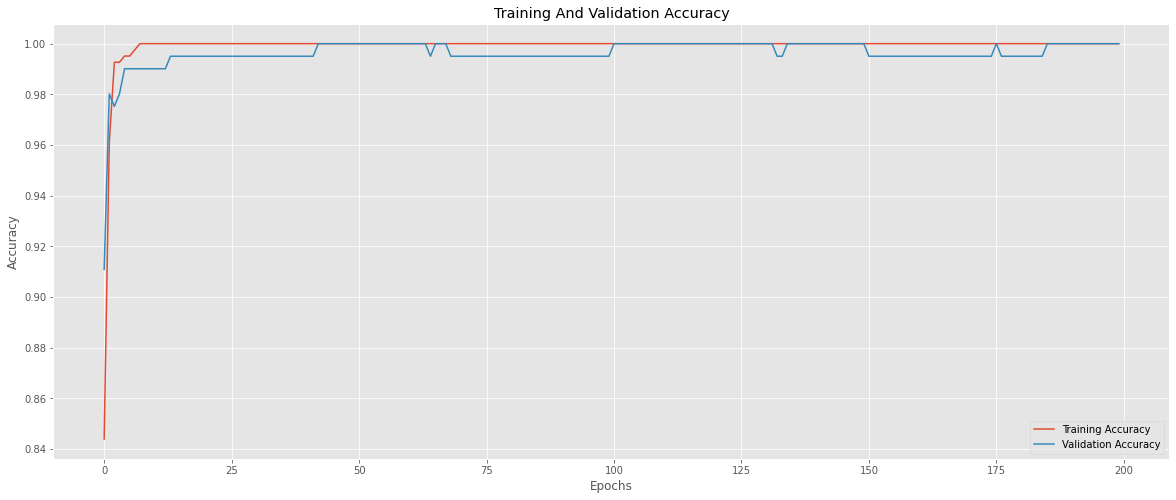

In [48]:
# Displaying the the training session on a plot 
plt.style.use("ggplot") 

# Getting the accuracy and the validation accuracy 
acc = H.history["accuracy"]
val_acc = H.history["val_accuracy"]

# Getting the loss and the validation loss 
loss = H.history["loss"]
val_loss = H.history["val_loss"] 

# Getting the epochs range 
epoch_range = list(range(len(H.history["accuracy"])))

# Plotting the first graph for the accuracy 
plt.figure(figsize=(20, 8)) 
plt.plot(epoch_range, acc, label = "Training Accuracy") 
plt.plot(epoch_range, val_acc, label = "Validation Accuracy") 
plt.grid(True) 
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend(loc="lower right") 
plt.title("Training And Validation Accuracy") 
plt.show() 

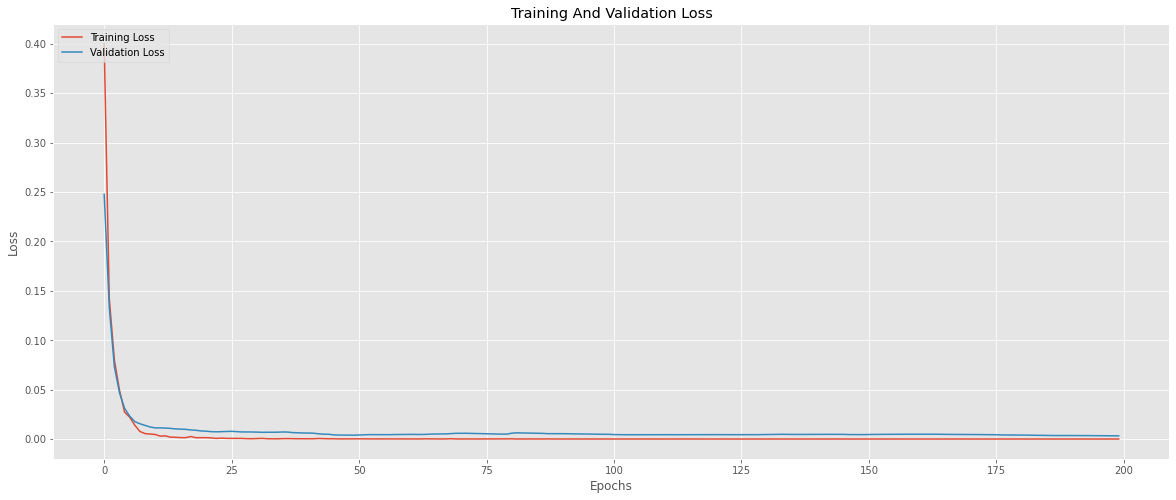

In [49]:
# Plotting the second graph for loss 
plt.figure(figsize=(20, 8))
plt.plot(epoch_range, loss, label = "Training Loss") 
plt.plot(epoch_range, val_loss, label = "Validation Loss") 
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend(loc="upper left") 
plt.title("Training And Validation Loss")                        
plt.show(); 

In [50]:
nedu = "dataset/chinedu_wav/000100.wav"
unknown = "dataset/unknown_wav/008.wav"

# loading the sound wav file into memory and extracting all its features 
loaded_data = get_features(nedu)

# Reshaping the data 
loaded_data = loaded_data.reshape(1, -1)

# Scaling 
loaded_data = scaler.transform(loaded_data)

In [51]:
# Making predictions 
pred = np.argmax(model.predict(loaded_data))
results = lb.classes_[pred]

# Displaying the result 
print(results)

chinedu


In [52]:
model.predict(loaded_data)

array([[1.000000e+00, 8.831517e-09]], dtype=float32)

In [53]:
lb.classes_

array(['chinedu', 'unknown'], dtype='<U7')

In [54]:
# Finding the predicted values percentage probabilities 
i = model.predict(loaded_data)[0]

# Converting into a list 
i = list(i)

# Chinedu prediction percentage 
chinedu_perc = i[0] * 100 

# Unknown perdiction precentage 
unknown_perc = i[1] * 100 

# Displaying the values 
print("Unknown value predicted percentage: {:.3f}".format(unknown_perc)) 
print("Chinedu value predicted percentage: {:.3f}".format(chinedu_perc))

Unknown value predicted percentage: 0.000
Chinedu value predicted percentage: 100.000


In [59]:
# Saving the model 
filename = "model/voice_recognition.h5" 

# Save model file 
model.save_weights(filename)

In [62]:
print(model)